Title:
1985 Auto Imports Database

Relevant Information:
Number of Instances: 205
Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
Target:
 26. price:                    continuous from 5118 to 45400.

In [159]:
#import all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import all price prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import warnings
import warnings
warnings.filterwarnings('ignore')

##Load 1985 dataset on autoMobile

In [134]:
df=pd.read_csv('/content/1985_car_data.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [135]:
#shape of dataset
df.shape

(200, 26)

In [136]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            200 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          200 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         200 non-null    

##***Feature Engineering***

In [137]:
#check all column list
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [138]:
# Manually set column names
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
    'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
    'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
    'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

# Assign the manually set column names to the DataFrame
df.columns = column_names

In [139]:
#check all column list
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [140]:
# Replace '?' with NaN
df.replace('?',0, inplace=True)

In [141]:
#check the null value in dataset
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [145]:
# Drop rows with missing target values
df.dropna(subset=['price'], inplace=True)

In [142]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [143]:
#count the nan vales in normalized-losses
df['normalized-losses'].value_counts().head()

normalized-losses
0      36
161    11
91      8
150     7
134     6
Name: count, dtype: int64

In [144]:
df['normalized-losses'].unique()

array([0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [146]:
df.shape

(200, 26)

In [147]:
# Convert appropriate columns to numeric types
numeric_columns = [
    'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
    'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [148]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [149]:
#save cleaned and rename columns dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [150]:
#check the categorical column list
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


In [151]:

# Show unique values for nominal attributes
categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                       'fuel-system']
#convert ever column data in to string
for col in categorical_columns:
    df[col] = df[col].astype(str)

##Exploratory Data Analysis (EDA)

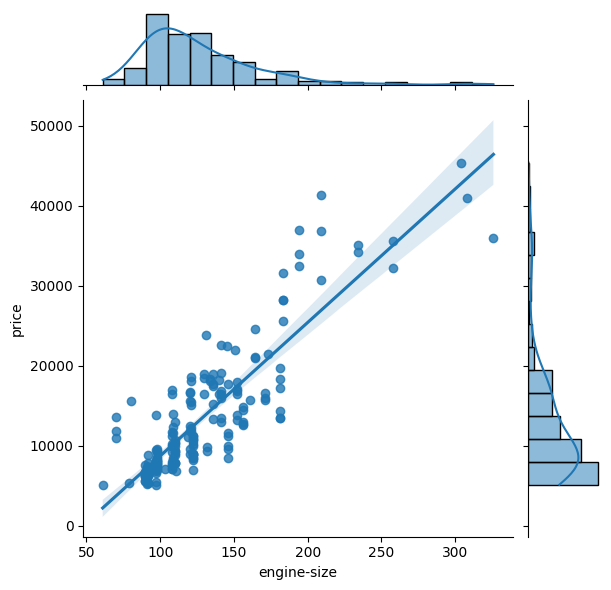

In [171]:
# Jointplot for price vs engine-size
sns.jointplot(x='engine-size', y='price', data=df, kind='reg')
plt.show()

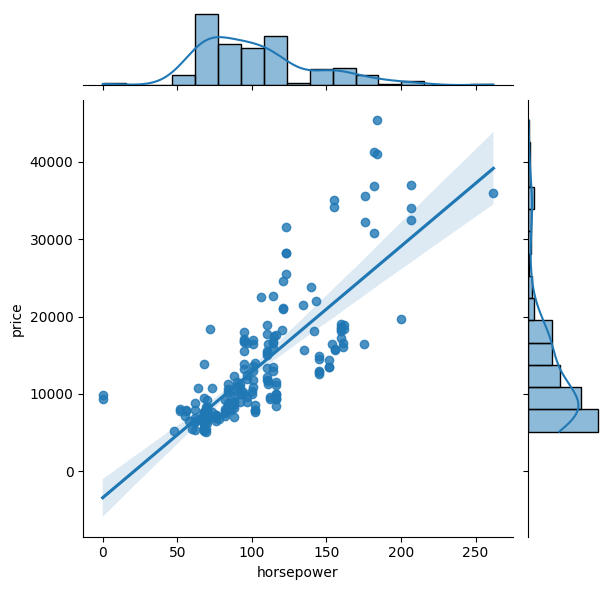

In [172]:
# Jointplot for price vs horsepower
sns.jointplot(x='horsepower', y='price', data=df, kind='reg')
plt.show()

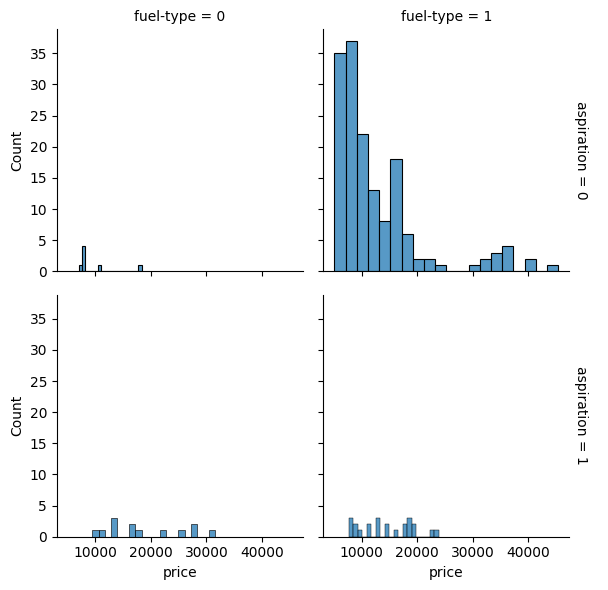

In [173]:
# FacetGrid for multiple categorical features
g = sns.FacetGrid(df, col='fuel-type', row='aspiration', margin_titles=True)
g.map(sns.histplot, 'price', bins=20)
g.add_legend()
plt.show()

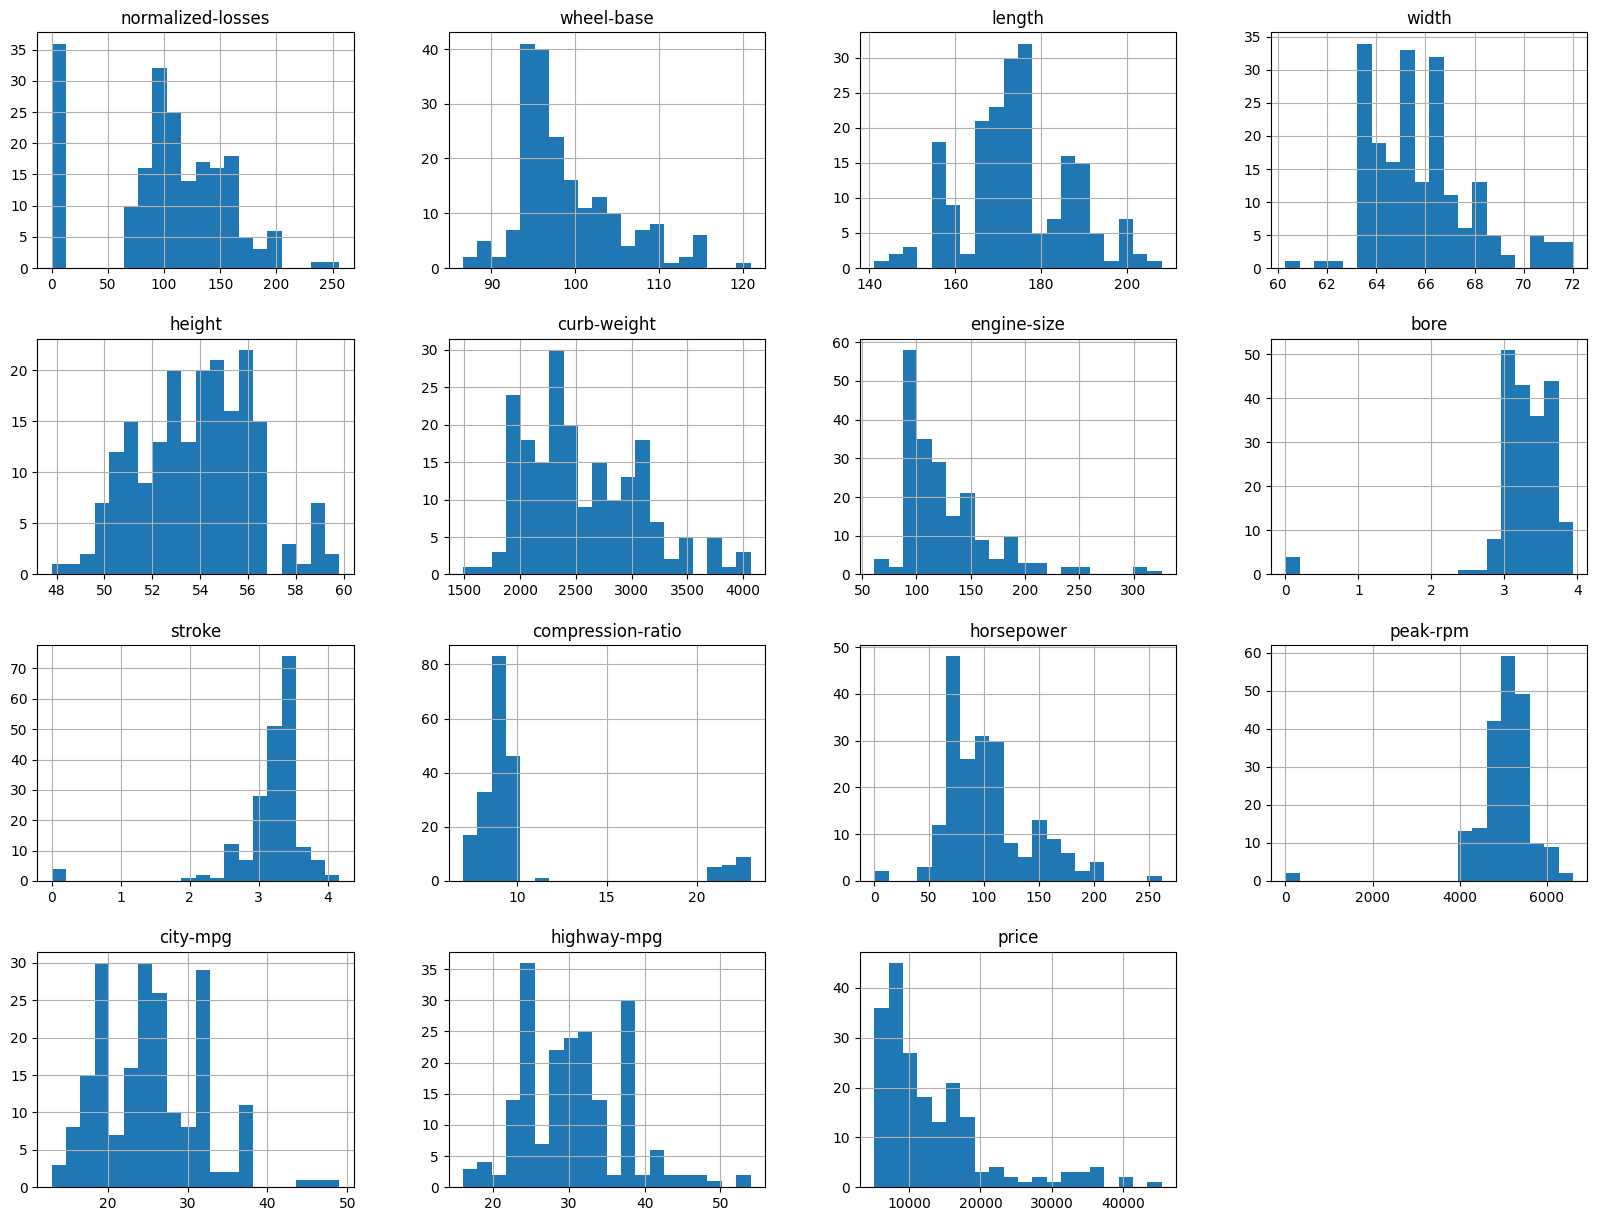

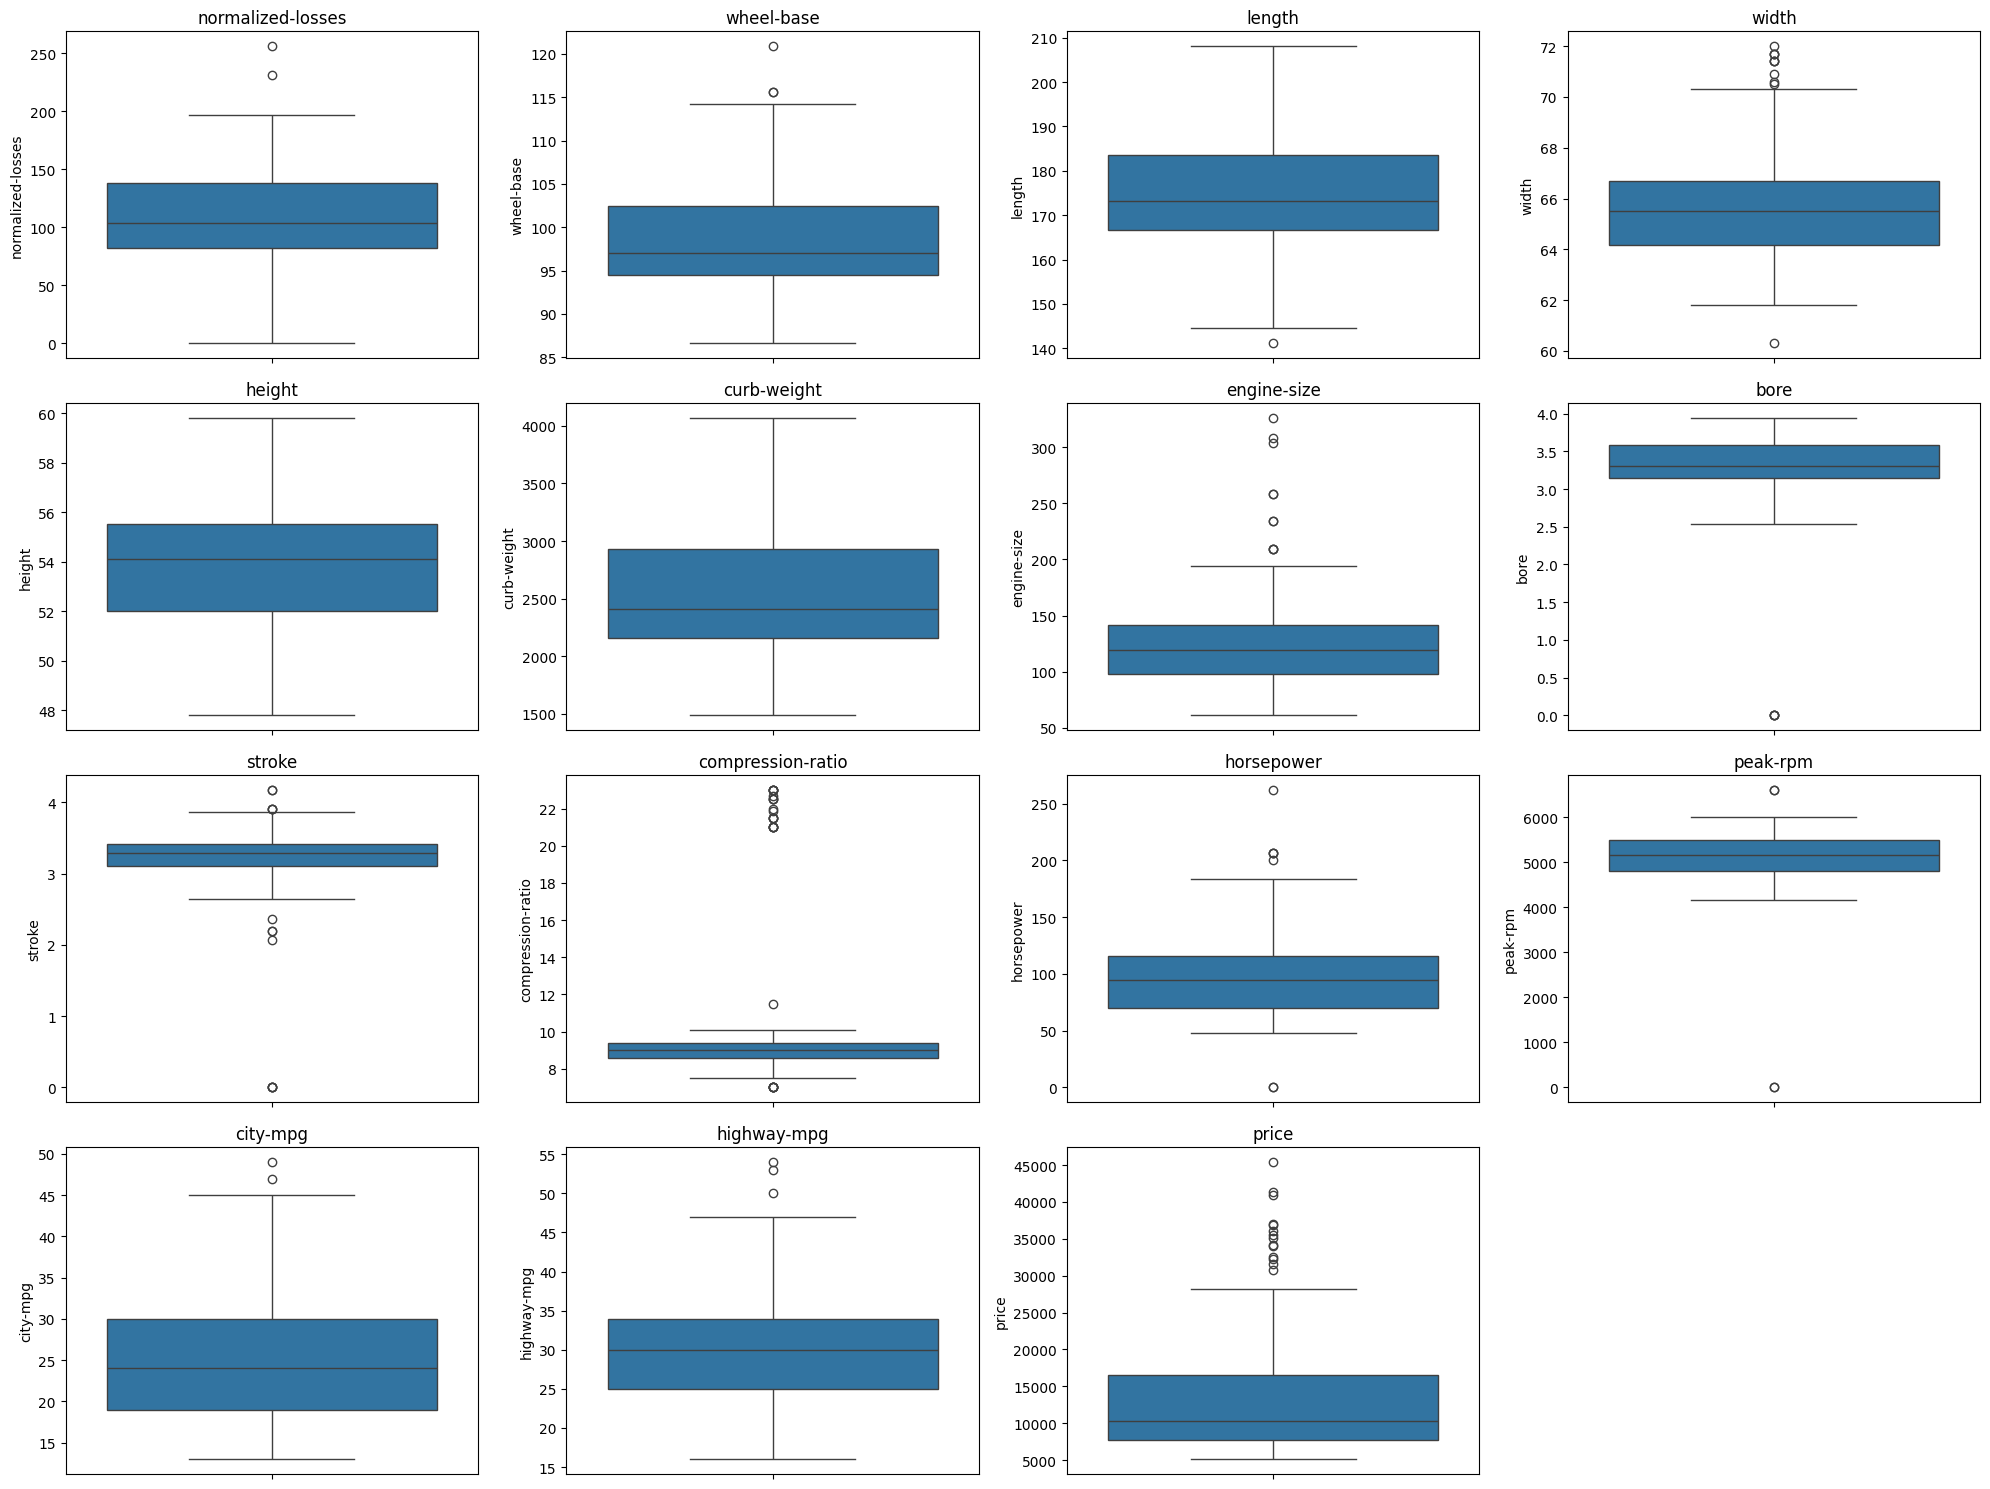

In [167]:
# Histograms for numerical features
df[numeric_columns].hist(figsize=(20, 15), bins=20)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

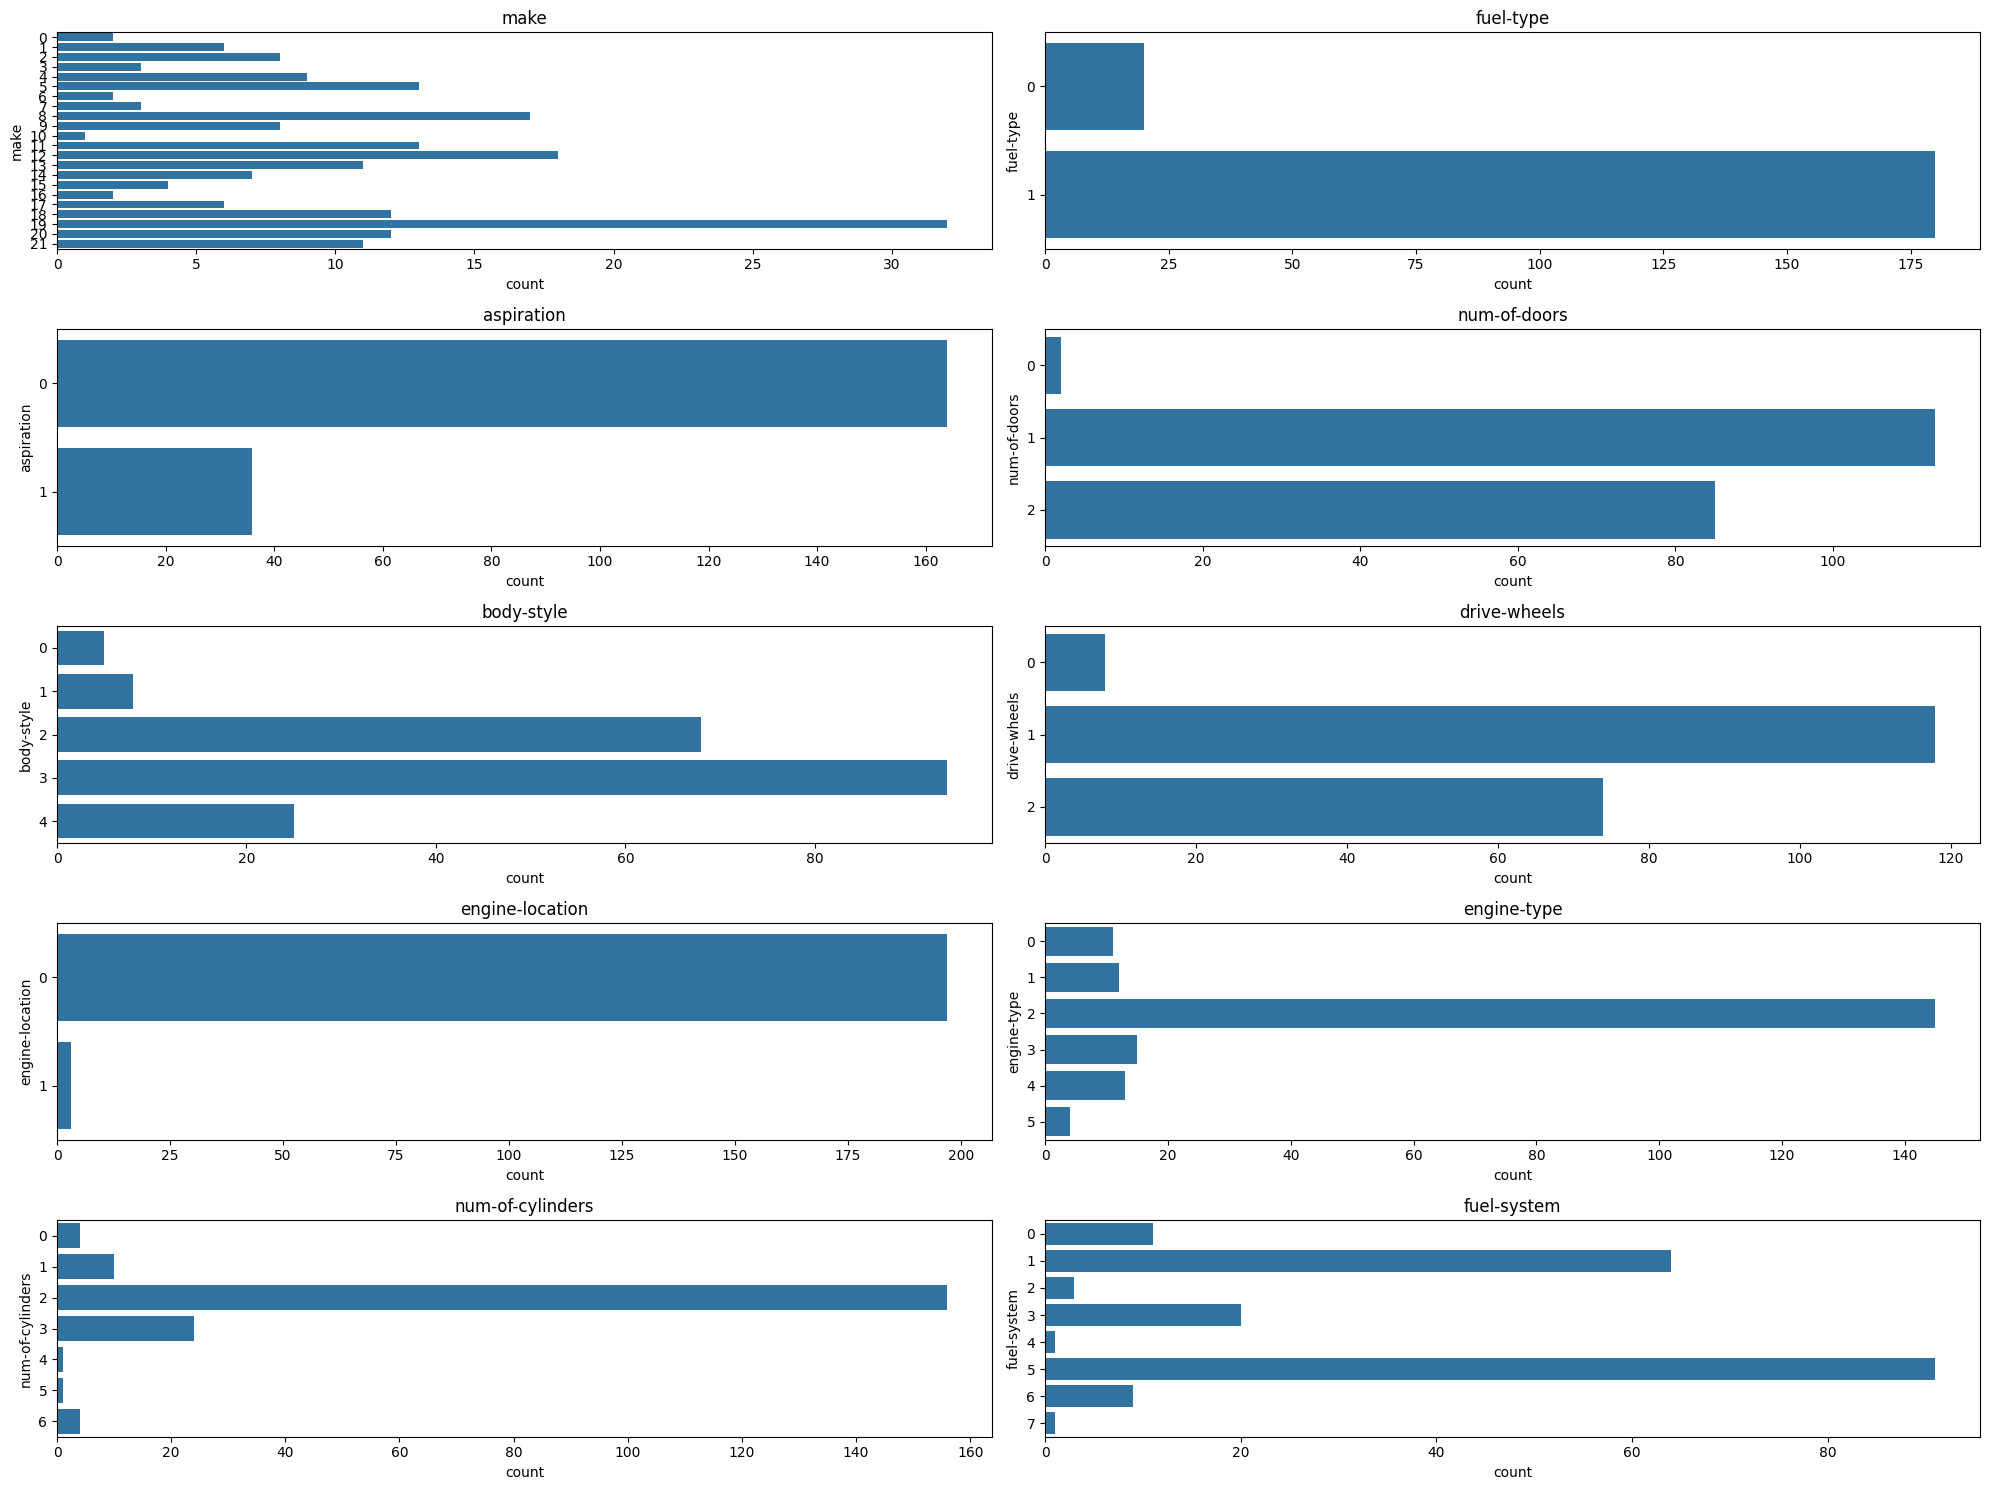

In [168]:
# Bar plots for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

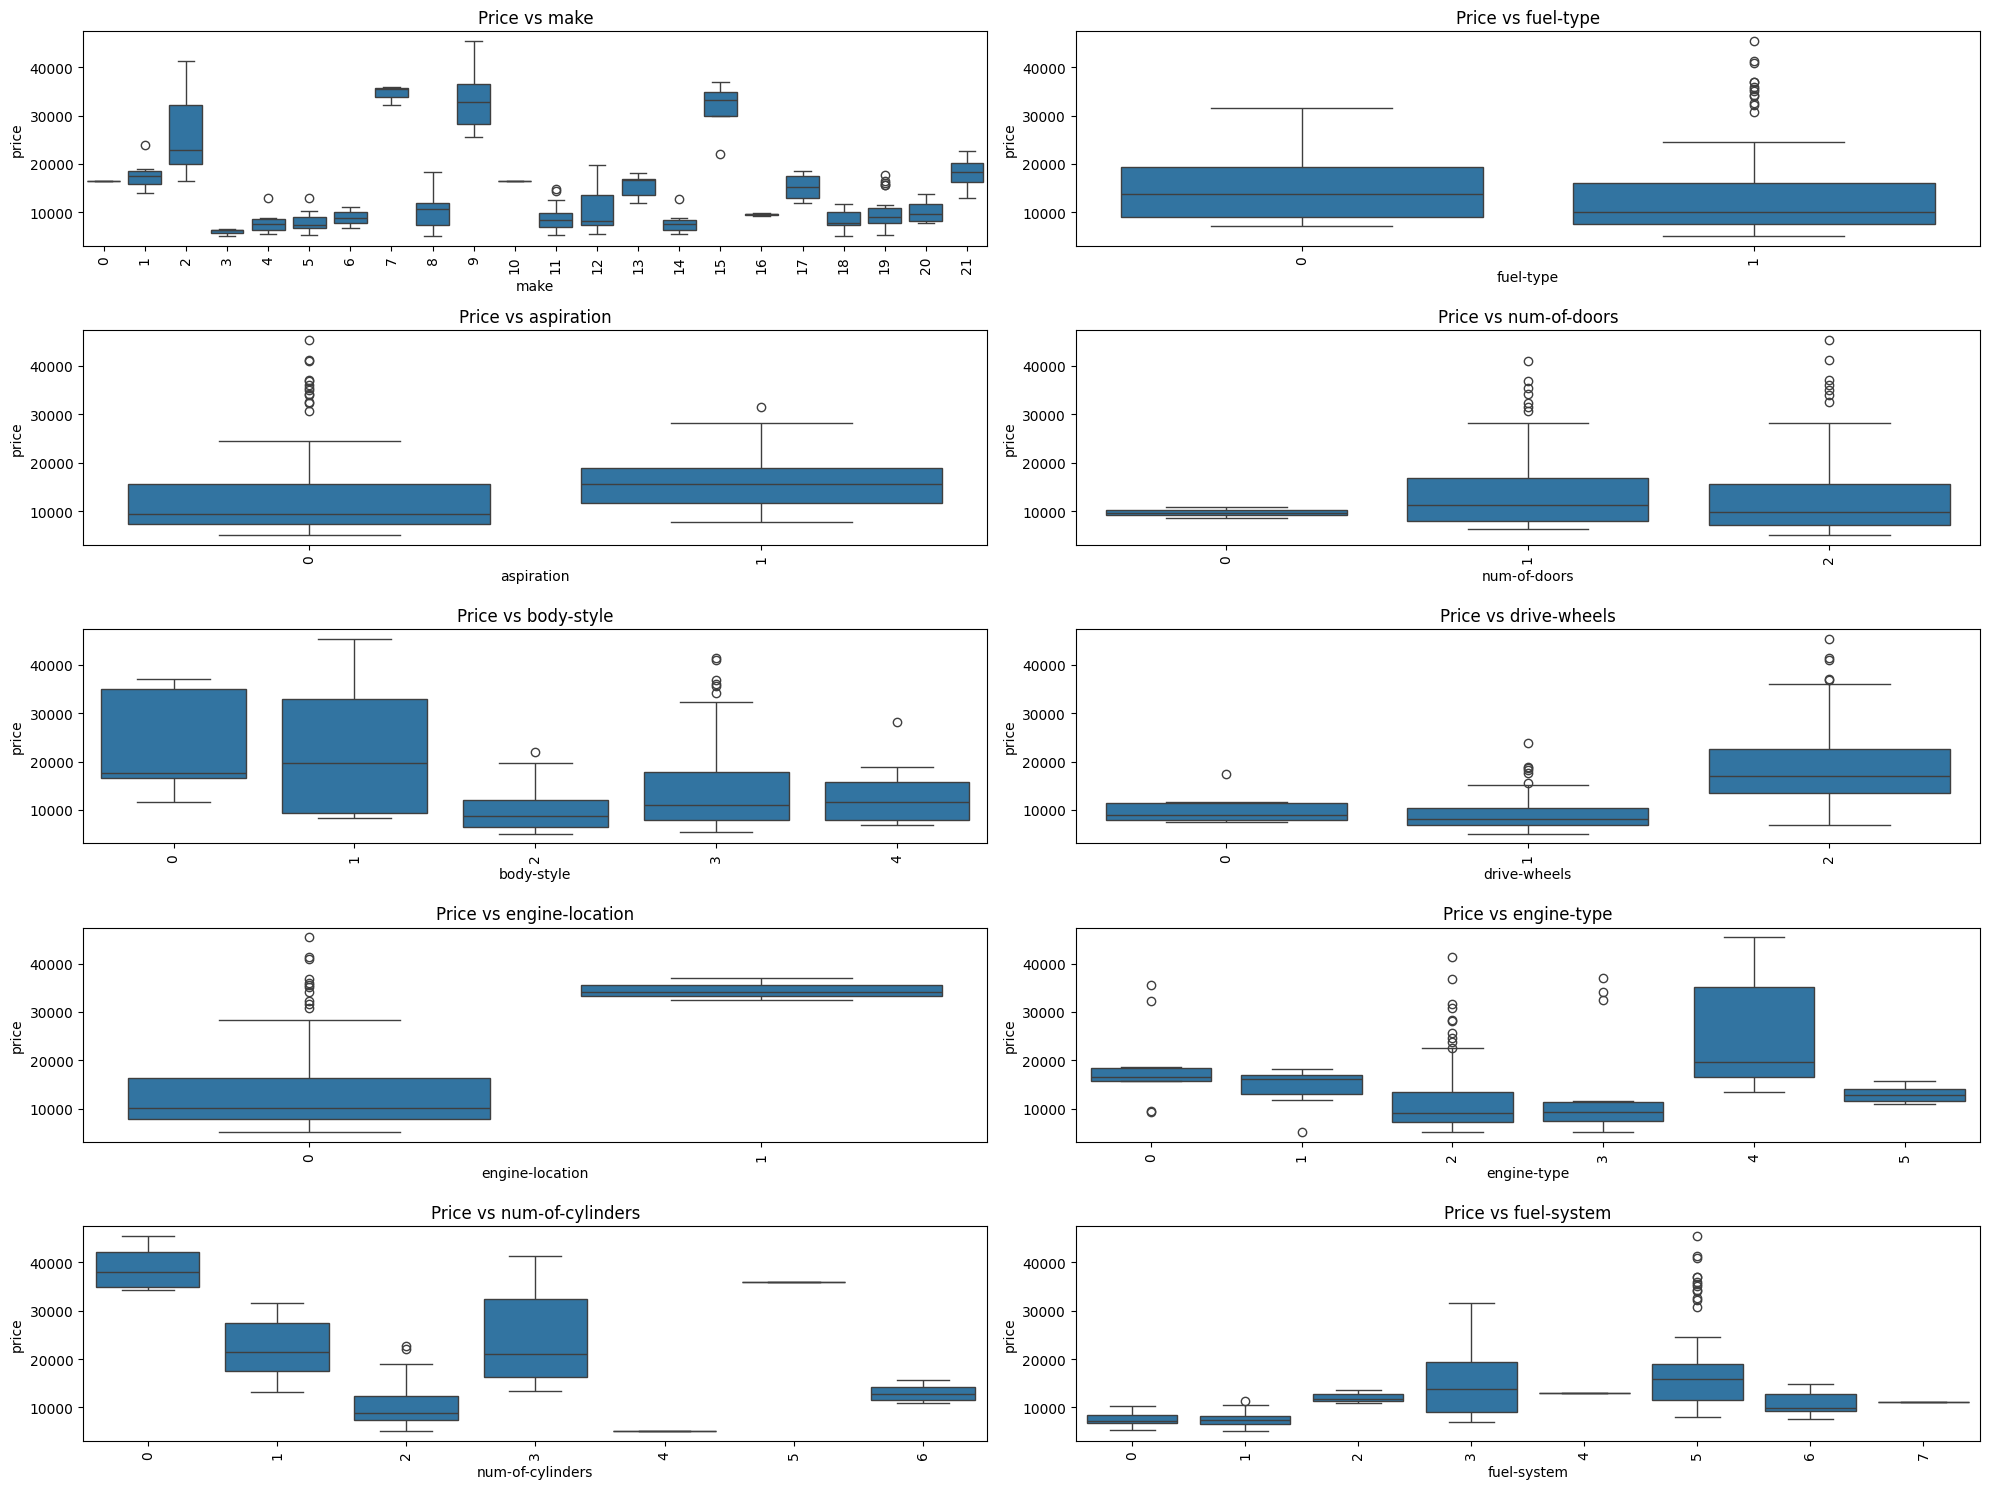

In [170]:
# Box plots of numerical features against categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

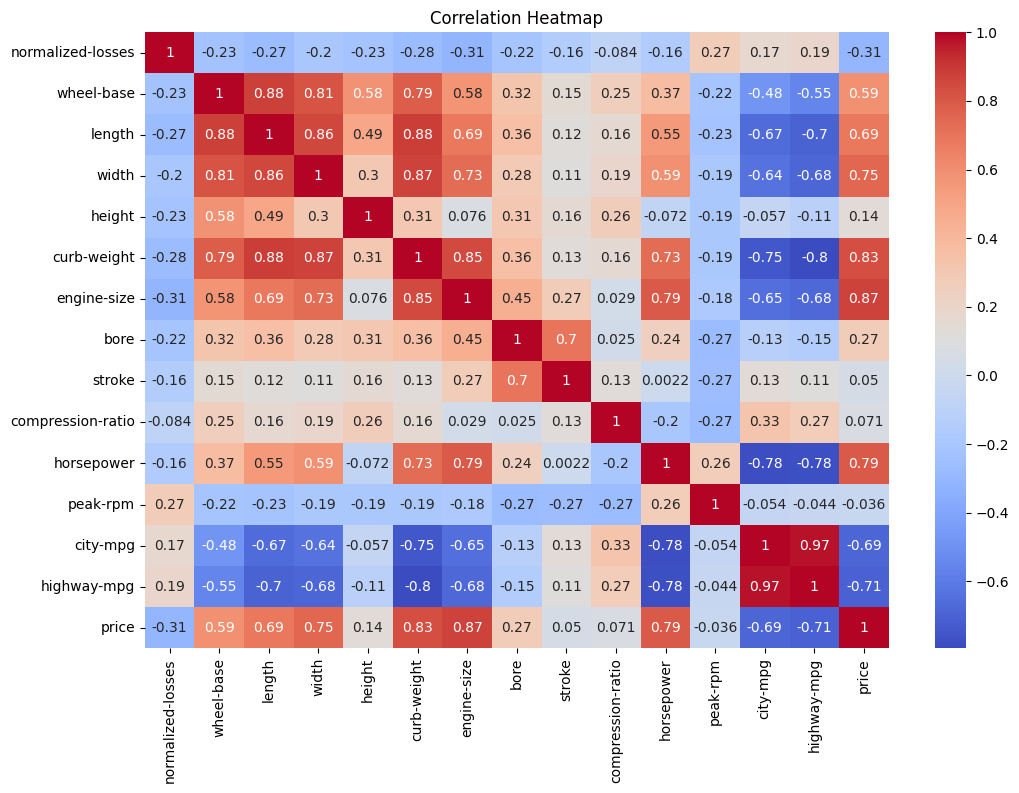

In [169]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#convert categorical data in to numerical data using label encoding

In [152]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [165]:
df.shape

(200, 26)

In [154]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
157,0,91,19,1,0,1,3,1,0,95.7,...,98,1,3.19,3.03,9.0,70,4800,28,34,9258
133,2,83,18,1,0,2,2,1,0,93.7,...,97,1,3.62,2.36,9.0,69,4900,31,36,5118
165,2,134,19,1,0,2,1,2,0,98.4,...,146,5,3.62,3.50,9.3,116,4800,24,30,11199
171,-1,65,19,1,0,1,3,1,0,102.4,...,122,5,3.31,3.54,8.7,92,4200,27,32,10898
185,3,256,20,1,0,2,2,1,0,94.5,...,109,5,3.19,3.40,8.5,90,5500,24,29,9980


##Splitting the Data into Training and Testing Sets

In [155]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

In [156]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
#applying different model in for loop at single time
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
results = {}

In [163]:
#for loop in model evalution
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

In [164]:
# Print results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.2f}")

# Identify the best model based on R2 Score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
print(f"\nBest Model: {best_model_name}")

Model Performance:

Linear Regression:
Mean Squared Error: 10218124.36
R2 Score: 0.91

Decision Tree:
Mean Squared Error: 5221155.81
R2 Score: 0.95

Random Forest:
Mean Squared Error: 3506275.69
R2 Score: 0.97

Best Model: Random Forest


In [174]:
#save model in pickle/export the model to apply on prediction in forther data
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(models[best_model_name], file)

##Conclusion:
Best Model: Random Forest\
Reason: The Random Forest model has the lowest Mean Squared Error (MSE) and the highest R2 Score among the models tested. This indicates that it has the best performance in terms of both minimizing prediction errors and explaining the variance in the target variable (price).